In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.sandbox.google.com/github/https-deeplearning-ai/sc-gc-c4-gemini-public/blob/main/lesson-4/L4_colab_images.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Cost Estimate

The estimated cost for running this notebook once using your Google Cloud account should be less than 0.10 USD (as of August 2024). Get the latest Gemini costs [here](https://cloud.google.com/vertex-ai/generative-ai/pricing).


# SETUP

This is follow up to the [How to Set Up your Google Cloud Account](https://learn.deeplearning.ai/courses/large-multimodal-model-prompting-with-gemini/lesson/9/how-to-set-up-your-google-cloud-account-|-try-it-out-yourself-[optional]) instructions from the course, [Large Multimodal Model Prompting with Gemini](https://learn.deeplearning.ai/courses/large-multimodal-model-prompting-with-gemini/lesson/1/introduction) on the [Learning Platform](https://learn.deeplearning.ai) of [DeepLearning.AI](https://www.deeplearning.ai).

### Install Vertex AI SDK and other Required Packages

In [1]:
%pip install --upgrade --user --quiet google-cloud-aiplatform

### Restart Runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [2]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### Authenticate your Notebook Environment (Colab Only)

If you're running this notebook on Google Colab, run the cell below to authenticate your environment.

**NOTE:** The Gmail email address you use to authenticate this lesson colab must be the same as the one you used to set up your Google Cloud account and your Project.

In [1]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud Project Information and Initialize Vertex AI SDK

**Add _your_ Project ID below**, which you created while following the [How to Set Up your Google Cloud Account](https://learn.deeplearning.ai/courses/large-multimodal-model-prompting-with-gemini/lesson/9/how-to-set-up-your-google-cloud-account-|-try-it-out-yourself-[optional]) instructions. If your `Project ID` was `dlai-shortcourse-on-gemini`, then you can run the cell below as it is. Otherwise, be sure to change it.

You can also look up your Project ID in your [Project Dashboard](https://console.cloud.google.com/projectselector2/home/dashboard).

In [2]:
PROJECT_ID = "dlai-shortcourse-on-gemini"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}


import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Utils Functions and Images

**Important Note:**

If using Google Colab, all the
```Python
from utils import ...
```

functions and all required images (and text file) are readily accessible in the notebook. Execute the following cells to proceed.


In [3]:
import typing
import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

from vertexai.preview.generative_models import (
    Image,
    Part,
)

def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)

def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Image):
            display_images([content])
        elif isinstance(content, Part):
            url = get_url_from_gcs(content.file_data.file_uri)
            IPython.display.display(load_image_from_url(url))
        else:
            print(content)

        print("\n")

def gemini_vision(contents, model):

    responses = model.generate_content(
        contents,
        stream=True)

    response_text = ""
    for response in responses:
        response_text += response.text
    return response_text

In [4]:
# download images and txt from bucket
! gsutil cp "gs://dlai-sc-gemini-bucket/bowl-fruits.jpg" ./bowl-fruits.jpg
! gsutil cp "gs://dlai-sc-gemini-bucket/price-list-fruits.jpg" ./price-list-fruits.jpg
! gsutil cp "gs://dlai-sc-gemini-bucket/chair-1.jpg" ./chair-1.jpg
! gsutil cp "gs://dlai-sc-gemini-bucket/chair-2.jpg" ./chair-2.jpg
! gsutil cp "gs://dlai-sc-gemini-bucket/chair-3.jpg" ./chair-3.jpg
! gsutil cp "gs://dlai-sc-gemini-bucket/chair-4.jpg" ./chair-4.jpg
! gsutil cp "gs://dlai-sc-gemini-bucket/room.jpg" ./room.jpg
! gsutil cp "gs://dlai-sc-gemini-bucket/breakfast.jpg" ./breakfast.jpg
! gsutil cp "gs://dlai-sc-gemini-bucket/lunch.jpg" ./lunch.jpg
! gsutil cp "gs://dlai-sc-gemini-bucket/diner.jpg" ./diner.jpg
! gsutil cp "gs://dlai-sc-gemini-bucket/meal-others.jpg" ./meal-others.jpg
! gsutil cp "gs://dlai-sc-gemini-bucket/travel-policy.txt" ./travel-policy.txt

Copying gs://dlai-sc-gemini-bucket/bowl-fruits.jpg...
/ [1 files][163.8 KiB/163.8 KiB]                                                
Operation completed over 1 objects/163.8 KiB.                                    
Copying gs://dlai-sc-gemini-bucket/price-list-fruits.jpg...
/ [1 files][ 52.3 KiB/ 52.3 KiB]                                                
Operation completed over 1 objects/52.3 KiB.                                     
Copying gs://dlai-sc-gemini-bucket/chair-1.jpg...
/ [1 files][  5.7 KiB/  5.7 KiB]                                                
Operation completed over 1 objects/5.7 KiB.                                      
Copying gs://dlai-sc-gemini-bucket/chair-2.jpg...
/ [1 files][  6.2 KiB/  6.2 KiB]                                                
Operation completed over 1 objects/6.2 KiB.                                      
Copying gs://dlai-sc-gemini-bucket/chair-3.jpg...
/ [1 files][  8.8 KiB/  8.8 KiB]                                                
Ope

# IN COURSE VIDEO

Lesson video starts from below.

# [Lesson 4: Creating Use Cases with Images](https://learn.deeplearning.ai/courses/large-multimodal-model-prompting-with-gemini/lesson/5/creating-use-cases-with-images)

In this lesson, you'll go through Gemini's Multimodality capabilities, by passing Images and Texts as input.

### 1 - Let's make a Fruit Salad!

In [5]:
from vertexai.generative_models import GenerativeModel, Image

Please note that Google's Gemini model `gemini-1.0-pro-vision-001` [is being deprecated (soon)](https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations). Therefore, it is necessary to switch to the recommended replacement model, `gemini-2.0-flash`.

- Load the [gemini-2.0-flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.0-flash) model.

In [6]:
multimodal_model = GenerativeModel("gemini-2.0-flash")

- Load the images.

In [7]:
fruit = Image.load_from_file("./bowl-fruits.jpg")

In [8]:
prices = Image.load_from_file("./price-list-fruits.jpg")

In [9]:
images = [fruit, prices]

In [10]:
# from utils import print_multimodal_prompt

-------images--------


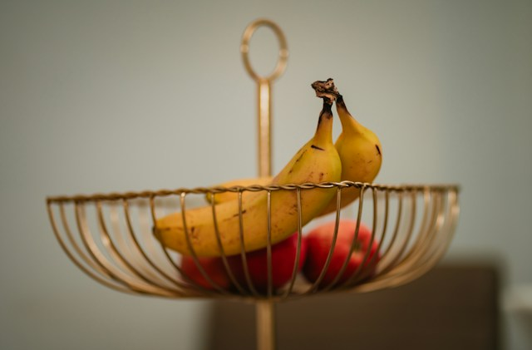

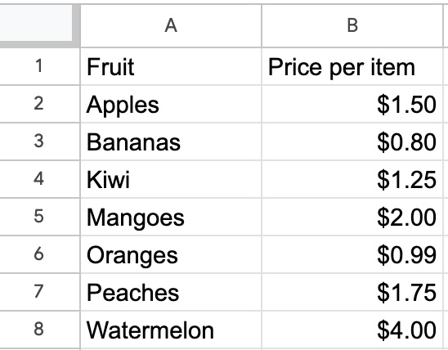

In [11]:
print("-------images--------")
print_multimodal_prompt(images)

- You can provide instructions (set the stage) for the model, and based off those, ask questions.
- And to be able to answer the questions, the model needs to first look at the images.

- Provide the model with some instructions.

In [12]:
instruction_1 = """
I want to make a fruit salad with three bananas, two apples, \
one kiwi, and one orange. This is an image of my bowl \
of fruits:
"""

In [13]:
instruction_2 = "This is the price list for fruits at \
my supermarket:"

- Provide the model with some questions.

In [14]:
question = """
Please answer these questions:
- Describe which fruits and how many I have in my fruit bowl on \
the image?
- Given the fruits in my bowl on the image and the fruit salad \
recipe, what am I missing?
- Given the fruits I still need to buy, what \
would be the prices and total cost for these fruits?
"""

- Remember, structure and order is important.

In [15]:
contents = [
    instruction_1,
    fruit,
    instruction_2,
    prices,
    question,
]

-------Prompt--------

I want to make a fruit salad with three bananas, two apples, one kiwi, and one orange. This is an image of my bowl of fruits:





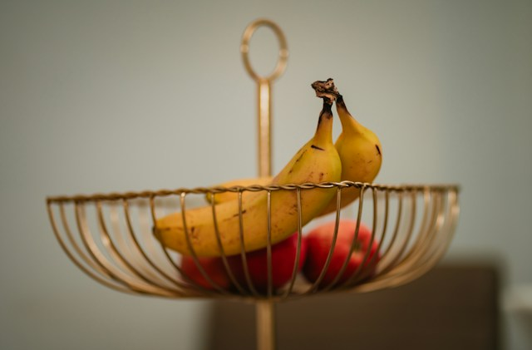



This is the price list for fruits at my supermarket:




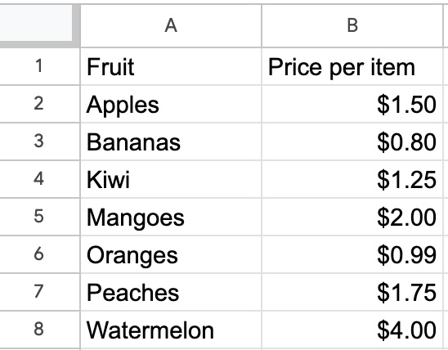




Please answer these questions:
- Describe which fruits and how many I have in my fruit bowl on the image?
- Given the fruits in my bowl on the image and the fruit salad recipe, what am I missing?
- Given the fruits I still need to buy, what would be the prices and total cost for these fruits?





In [16]:
print("-------Prompt--------")
print_multimodal_prompt(contents)

In [17]:
# from utils import gemini_vision

**Note**: LLM's do not always produce the same results, especially because they are frequently updated. So the output you see in the video might be different than what you may get.

In [18]:
print("\n-------Response--------\n")

response = gemini_vision(
            contents,
            multimodal_model)

print(response, end="")


-------Response--------

Okay, let's break down your fruit salad situation:

**1. Fruits in your Bowl:**

Based on the image, it looks like you have:

*   2 Bananas
*   2 Apples

**2. Missing Fruits:**

You want to make a fruit salad with:

*   3 Bananas
*   2 Apples
*   1 Kiwi
*   1 Orange

Comparing this to what you have, you're missing:

*   1 Banana
*   1 Kiwi
*   1 Orange

**3. Cost of Missing Fruits:**

Using the price list from your supermarket:

*   1 Banana: $0.80
*   1 Kiwi: $1.25
*   1 Orange: $0.99

**Total Cost:** $0.80 + $1.25 + $0.99 = $3.04

So, you need to spend $3.04 to buy the fruits to complete your fruit salad recipe!


In [19]:
# 0.80 + 1.25 + 0.99

## 2 - Your very own Interior Designer!

In [20]:
furniture_images_uri = [
    "./chair-1.jpg",
    "./chair-2.jpg",
    "./chair-3.jpg",
    "./chair-4.jpg",
]

In [21]:
room_image = Image.load_from_file("./room.jpg")

- You can make a `list` of images which can then be passed on to the model.

In [22]:
furniture_images = [Image.load_from_file(uri)
                    for uri in furniture_images_uri]

In [23]:
images_2 = [room_image]

In [24]:
images_2.extend(furniture_images)

-------images--------


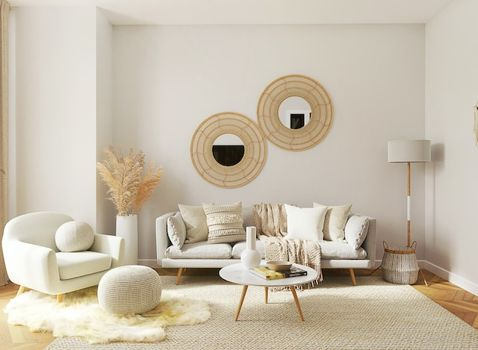

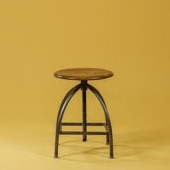

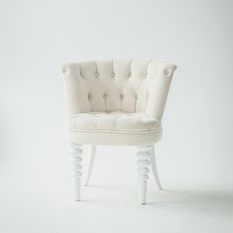

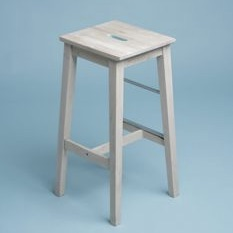

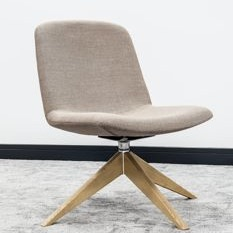

In [25]:
print("-------images--------")
print_multimodal_prompt(images_2)

- Instead of having multiple variables (instructions/questions/images) as contents for the model, you can combine everything together as well.

In [26]:
recommendation_content = [
    "You are an interior designer.",
    "Consider the following chairs:",
    "chair 1:",
    furniture_images[0],
    "chair 2:",
    furniture_images[1],
    "chair 3:",
    furniture_images[2],
    "chair 4:",
    furniture_images[3],
    "room:",
    room_image,
    "For each chair, \
explain whether it would be appropriate for the \
style of the room:",
]

-------Prompt--------
You are an interior designer.


Consider the following chairs:


chair 1:




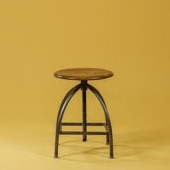



chair 2:




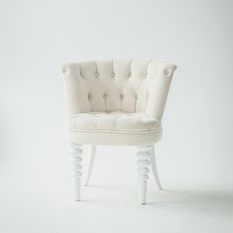



chair 3:




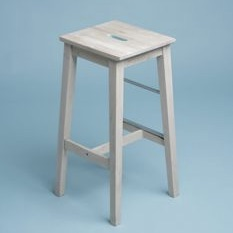



chair 4:




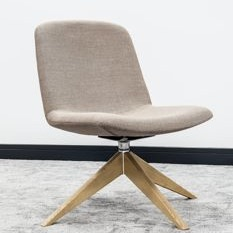



room:




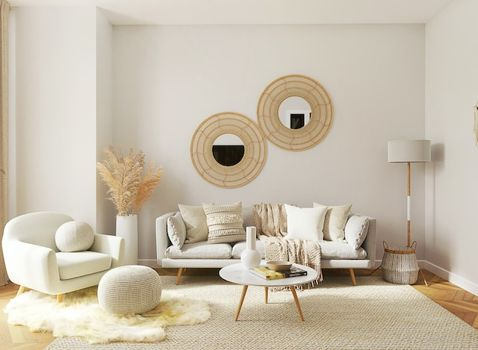



For each chair, explain whether it would be appropriate for the style of the room:




In [27]:
print("-------Prompt--------")
print_multimodal_prompt(recommendation_content)

**Note**: LLM's do not always produce the same results, especially because they are frequently updated. So the output you see in the video might be different than what you may get.

In [28]:
### Remember, you are using gemini-1.0-pro-vision-001
multimodal_model = GenerativeModel("gemini-1.0-pro-vision-001")

print("\n-------Response--------\n")

response = gemini_vision(
            recommendation_content,
            multimodal_model)

print(response, end="")


-------Response--------

 Chair 1: This chair would not be appropriate for the style of the room. The room has a modern, minimalist style, and the chair is too traditional and rustic.
Chair 2: This chair would not be appropriate for the style of the room. The room has a modern, minimalist style, and the chair is too traditional and ornate.
Chair 3: This chair would be appropriate for the style of the room. The chair has a modern, minimalist style, and it would complement the other furniture in the room.
Chair 4: This chair would be appropriate for the style of the room. The chair has a modern, minimalist style, and it would complement the other furniture in the room.

## Need to request Business Expense Reimbursement?

Please note that Google's Gemini model `gemini-1.5-pro-001` [is being deprecated (soon)](https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations). Therefore, it is necessary to switch to the recommended replacement model, `gemini-2.0-flash`.

- Load the [gemini-2.0-flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.0-flash) model.

In [29]:
multimodal_model = GenerativeModel("gemini-2.0-flash")

In [30]:
receipt_images_uri = [
    './breakfast.jpg',
    './lunch.jpg',
    './diner.jpg',
    './meal-others.jpg',
]

In [31]:
receipt_images = [Image.load_from_file(uri)
                  for uri in receipt_images_uri]

- You can also pass files such as `.txt` or `.pdf` to the model as well.

In [32]:
with open("travel-policy.txt", "r") as file:
    policy = file.read()

In [33]:
# print(policy)

In [34]:
INSTRUCTION = "Never make up facts, and if you are not 100% sure, \
be transparent in stating when you are not sure, or do not \
have enough information to answer certain questions or \
fulfill certain requests."

In [35]:
ROLE = "You are an HR professional and an expert in travel expenses."

In [36]:
ASSIGNMENT = """
You are reviewing travel expenses for a business trip.
Please complete the following tasks:
1. Itemize everything on the receipts, including tax and \
total.  This means identifying the cost of individual \
items that add up to the total cost before tax, as well \
as the tax ,such as sales tax, as well as tip.
2. What is the total sales tax paid?  In some cases, \
the total sales tax may be a sum of more than one line \
item of the receipt.
3. For this particular receipt, the employee who is \
adding this business expense purchased the meal with \
a group. The employee only ordered the KFC Bowl. Please \
provide the cost of the employee's order only.  Include \
both the cost before tax, and also estimate the tax \
that is applied to this employee's order.  To do this,\
calculate the fraction of the employee's pre-tax order\
divided by the total pre-tax cost.  This fraction can be \
applied to the total sales tax that you calculated earlier.
4.  Please calculate the amount spent by others, which \
are all the other line items on the receipt.  Please \
provide this sum before tax, and if possible, apply the \
tax for the total cost.
5. Check the expenses against company policy and flag \
if there are issues.
"""


In [37]:
receipt_content = [
    INSTRUCTION,
    ROLE,
    "Answer the questions based on the following receipts:"
    "breakfast:",
    receipt_images[0],
    "lunch:",
    receipt_images[1],
    "diner",
    receipt_images[2],
    "meal-others",
    receipt_images[3],
    ASSIGNMENT,
    policy,
]

Never make up facts, and if you are not 100% sure, be transparent in stating when you are not sure, or do not have enough information to answer certain questions or fulfill certain requests.


You are an HR professional and an expert in travel expenses.


Answer the questions based on the following receipts:breakfast:




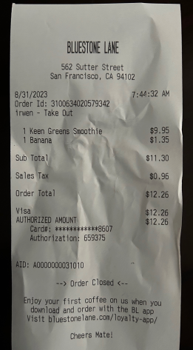



lunch:




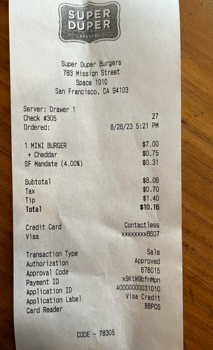



diner




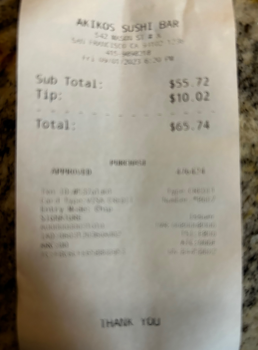



meal-others




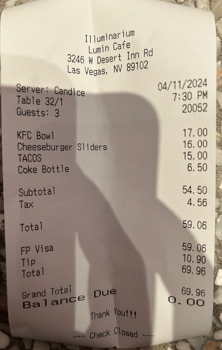




You are reviewing travel expenses for a business trip.
Please complete the following tasks:
1. Itemize everything on the receipts, including tax and total.  This means identifying the cost of individual items that add up to the total cost before tax, as well as the tax ,such as sales tax, as well as tip.
2. What is the total sales tax paid?  In some cases, the total sales tax may be a sum of more than one line item of the receipt.
3. For this particular receipt, the employee who is adding this business expense purchased the meal with a group. The employee only ordered the KFC Bowl. Please provide the cost of the employee's order only.  Include both the cost before tax, and also estimate the tax that is applied to this employee's order.  To do this,calculate the fraction of the employee's pre-tax orderdivided by the total pre-tax cost.  This fraction can be applied to the total sales tax that you calculated earlier.
4.  Please calculate the amount spent by others, which are all the o

In [38]:
print_multimodal_prompt(receipt_content)

**Note**: LLM's do not always produce the same results, especially because they are frequently updated. So the output you see in the video might be different than what you may get.

In [39]:
print("\n-------Response--------\n")

response = gemini_vision(
            receipt_content,
            multimodal_model)

print(response, end="")


-------Response--------

Okay, I will review the receipts and provide an analysis according to your instructions, following the Gemini Multimodal Business Travel Expense Policy.

**Receipt Analysis**

**1. Itemization of Receipts**

**Breakfast (Bluestone Lane):**

*   1 Keen Greens Smoothie: $9.95
*   1 Banana: $1.35
*   Subtotal: $11.30
*   Sales Tax: $0.96
*   **Order Total: $12.26**

**Lunch (Super Duper Burgers):**

*   1 Mini Burger: $7.00
*   Cheddar: $0.75
*   SF Mandate (4.00%): $0.31
*   Subtotal: $8.06
*   Tax: $0.70
*   Tip: $1.40
*   **Total: $10.16**

**Dinner (Akiko's Sushi Bar):**

*   Subtotal: $55.72
*   Tip: $10.02
*   **Total: $65.74**

**Meal - Others (Illuminarium Cafe):**

*   KFC Bowl: $17.00
*   Cheeseburger Sliders: $16.00
*   Tacos: $15.00
*   Coke Bottle: $6.50
*   Subtotal: $54.50
*   Tax: $4.56
*   Tip: $10.90
*   **Total: $69.96**

**2. Total Sales Tax Paid**

*   Breakfast: $0.96
*   Lunch: $0.70
*   Meal - Others: $4.56
*   **Total Sales Tax: $6.22**

